In [5]:
x = 0

y = 0
print('fff')
import os
import pandas as pd




import matplotlib.pyplot as plt
df = pd.read_csv("201910-citibike-tripdata.csv")
df.head()


fff


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,527,2019-10-01 00:00:05.6180,2019-10-01 00:08:52.9430,3746,6 Ave & Broome St,40.724308,-74.004730,223,W 13 St & 7 Ave,40.737815,-73.999947,41750,Subscriber,1993,1
1,174,2019-10-01 00:00:15.8750,2019-10-01 00:03:10.1680,3301,Columbus Ave & W 95 St,40.791956,-73.968087,3283,W 89 St & Columbus Ave,40.788221,-73.970416,18264,Subscriber,1992,1
2,759,2019-10-01 00:00:19.8240,2019-10-01 00:12:59.7070,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,174,E 25 St & 1 Ave,40.738177,-73.977387,25525,Subscriber,1995,1
3,615,2019-10-01 00:00:21.0680,2019-10-01 00:10:36.6790,254,W 11 St & 6 Ave,40.735324,-73.998004,477,W 41 St & 8 Ave,40.756405,-73.990026,30186,Subscriber,1992,1
4,761,2019-10-01 00:00:26.3800,2019-10-01 00:13:08.3130,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,174,E 25 St & 1 Ave,40.738177,-73.977387,25597,Subscriber,1992,1


In [6]:
t1 = df[['start station id', 'start station name', 'start station latitude', 'start station longitude']] \
            .drop_duplicates().rename(columns = {'start station id':'station id', \
                                                 'start station name':'station name', \
                                                 'start station latitude':'station latitude', 
                                                 'start station longitude': 'station longitude'})
t2 = df[['end station id', 'end station name', 'end station latitude', 'end station longitude']] \
        .drop_duplicates().rename(columns = {'end station id':'station id', \
                                             'end station name':'station name', \
                                             'end station latitude':'station latitude', \
                                             'end station longitude': 'station longitude'})
df_loc = pd.concat([t1, t2]).drop_duplicates()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092573 entries, 0 to 2092572
Data columns (total 15 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 int64
gender                     int64
dtypes: float64(4), int64(6), object(5)
memory usage: 239.5+ MB


In [9]:
df = df[df['start station id']!=3036]
df = df[df['end station id']!=3036]
df_loc = df_loc[df_loc['station id']!=3036]


In [46]:
df_loc.to_csv("station_information.csv", index=None)

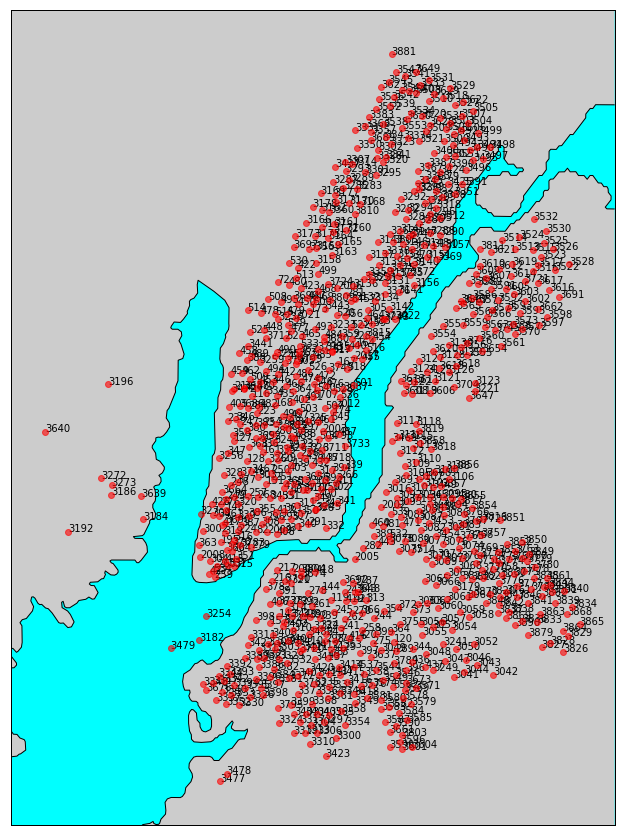

In [13]:
# Initialize plots
fig, ax = plt.subplots(figsize=(15,15))

# determine range to print based on min, max lat and lon of the data
lat = list(df_loc['station latitude'])
lon = list(df_loc['station longitude'])
text = list(df_loc['station id'])
margin = 0.01 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max - lon_min)/2,
            projection='lcc',
            resolution = 'f',)

m.drawcoastlines()
m.fillcontinents(lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawrivers()

# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)

# plot points as red dots
ax.scatter(lons, lats, marker = 'o', color='r', zorder=5, alpha=0.6)
for i in range(df_loc.shape[0]):
    plt.text(lons[i], lats[i], text[i])
plt.show()

ValueError: num must be 1 <= num <= 18, not 19

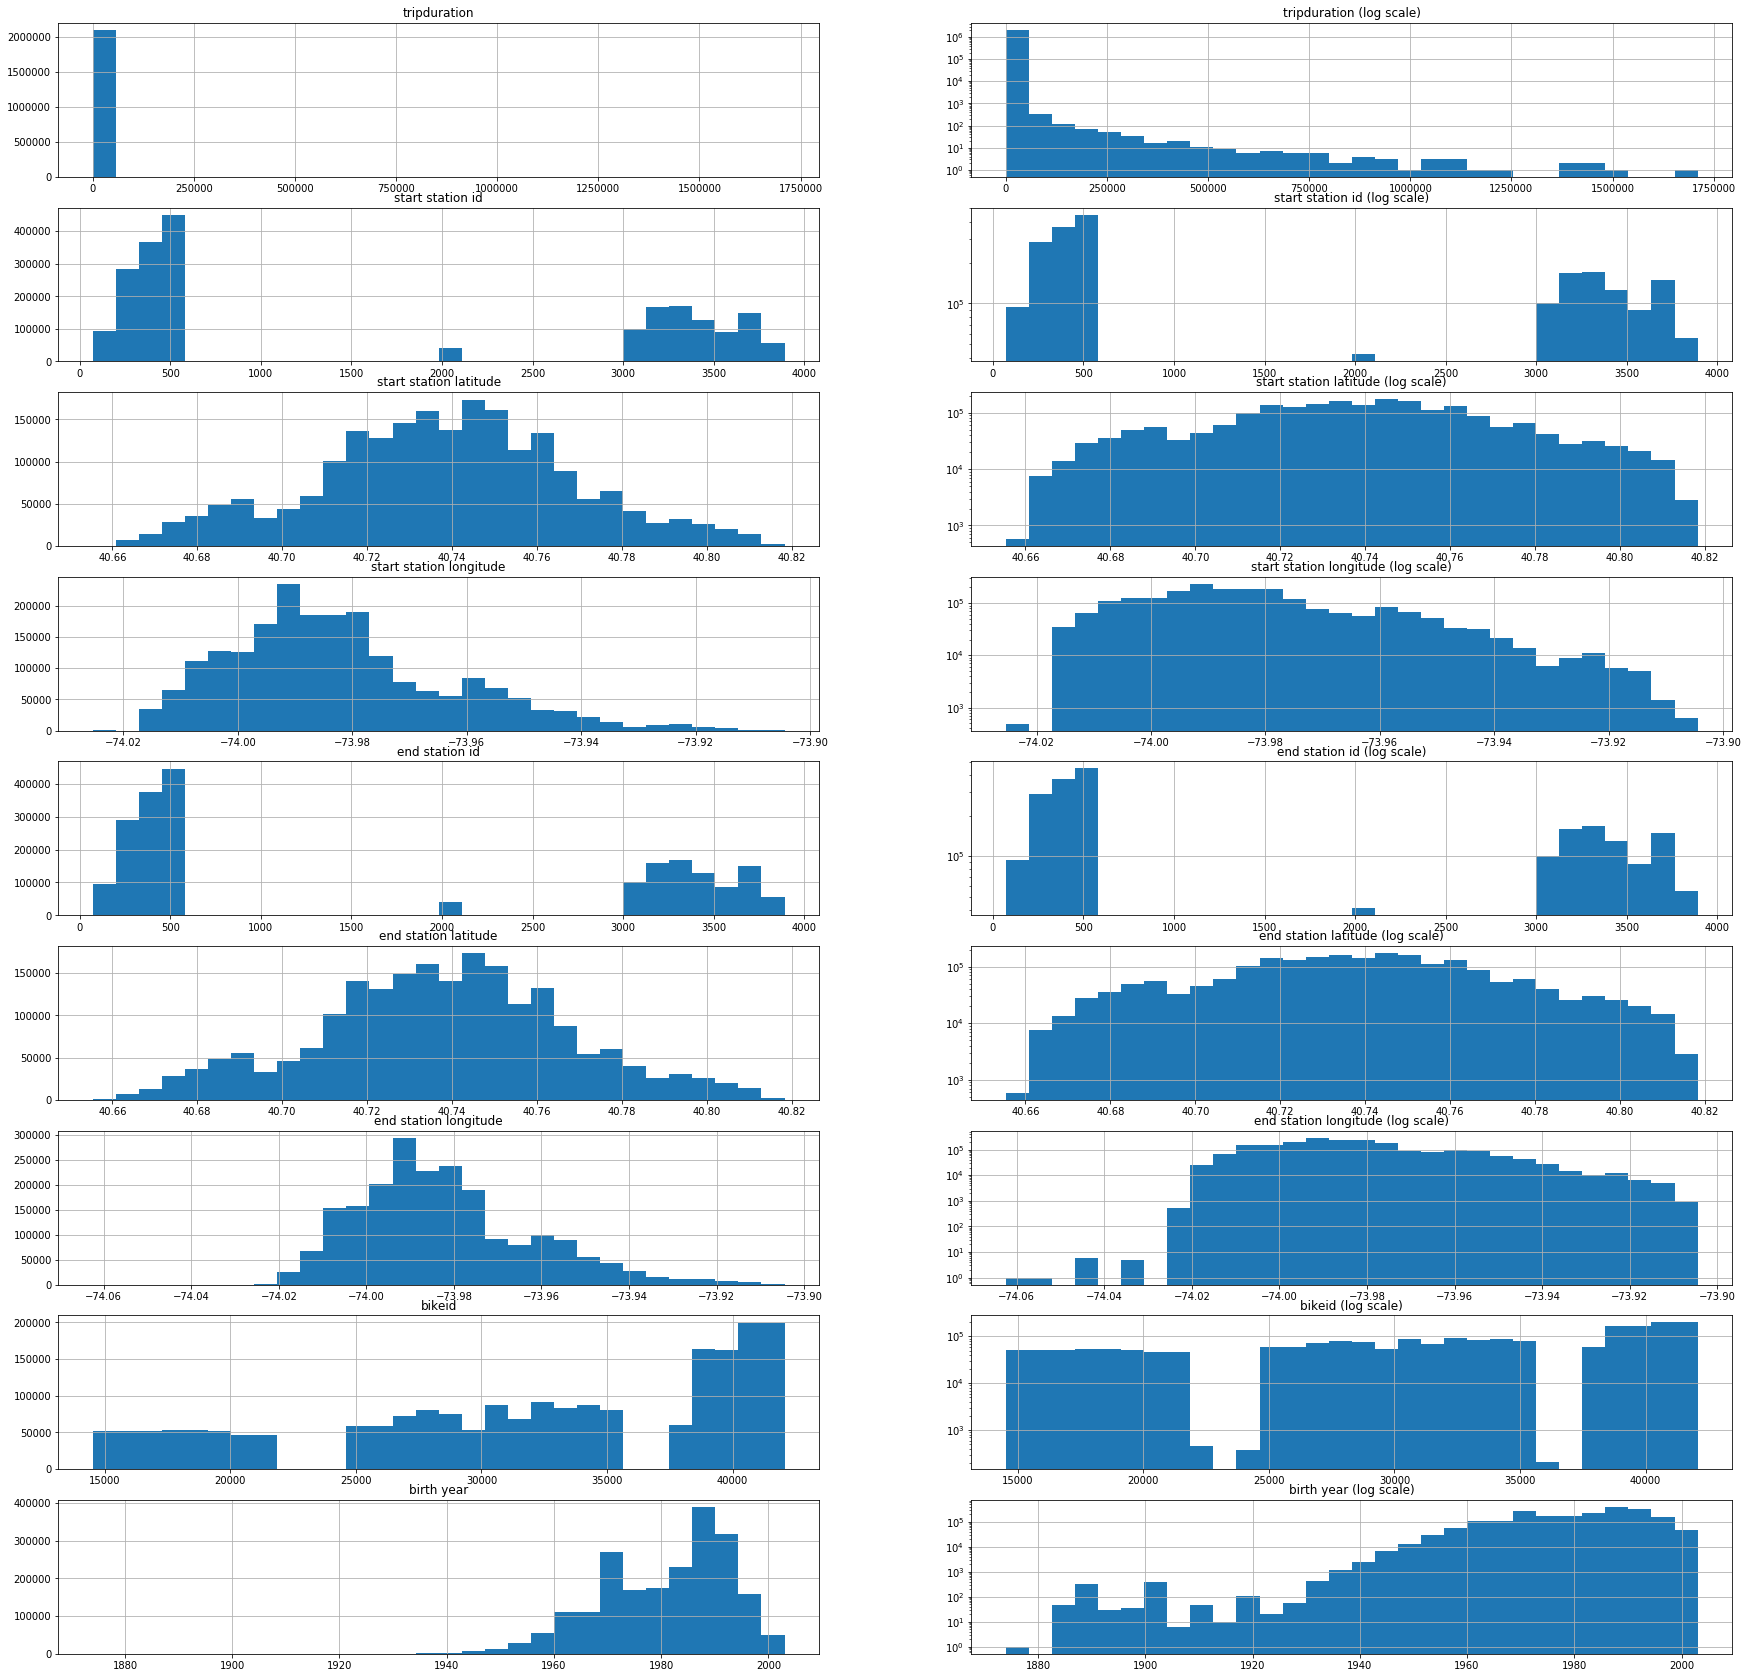

In [178]:
import numpy as np
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(30,30))

i = 1
for col in df.columns:
    if df[col].dtype == np.float64 or df[col].dtype == np.int64:
        ax = plt.subplot(9, 2, i)
        df[col].hist(bins=30)
        ax.set_title(col)
        i += 1
        ax = plt.subplot(9, 2, i)
        df[col].hist(bins=30)
        ax.set_title(col+" (log scale)")
        ax.set_yscale('log')
        i += 1

fig.tight_layout()
plt.show()

In [21]:
df = df[df['tripduration'] <= 24*60*60*20]


In [22]:
x1 = len(df['start station id'].unique())
y1 = len(df[['start station id', 'start station name']].drop_duplicates())
x2 = len(df['end station id'].unique())
y2 = len(df[['end station id', 'end station name']].drop_duplicates())

x1 == y1 and x2 == y2

True

In [23]:
x1 = len(df['start station id'].unique())
y2 = len(df[['start station id', 'start station latitude']].drop_duplicates())
x2 = len(df['end station id'].unique())
y2 = len(df[['end station id', 'end station latitude']].drop_duplicates())

x1 == y1 and x2 == y2

True

In [24]:
x1 = len(df['start station id'].unique())
y2 = len(df[['start station id', 'start station longitude']].drop_duplicates())
x2 = len(df['end station id'].unique())
y2 = len(df[['end station id', 'end station longitude']].drop_duplicates())

x1 == y1 and x2 == y2

True

In [25]:
# format example: 2017-07-01 00:00:00
df['starttime'] = pd.to_datetime(df['starttime'], format='%Y-%m-%d %H:%M:%S')
df['stoptime'] =pd.to_datetime(df['stoptime'], format='%Y-%m-%d %H:%M:%S')
df.info()

c:\users\aliaa\.conda\envs\project_map\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092564 entries, 0 to 2092572
Data columns (total 15 columns):
tripduration               int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 int64
gender                     int64
dtypes: datetime64[ns](2), float64(4), int64(6), object(3)
memory usage: 255.4+ MB


c:\users\aliaa\.conda\envs\project_map\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
def gen_time_segment(dt):
    if dt.minute < 30:
        minute = "%02d" % 0
    else:
        minute = "%02d" % 30
    return "{}-{}-{} {}:{}".format(dt.year, dt.month, dt.day, dt.hour, minute)

df['start_seg'] = [gen_time_segment(dt) for dt in df['starttime']]
df['stop_seg'] = [gen_time_segment(dt) for dt in df['stoptime']]

df[['start station id', 'starttime', 'start_seg', 'end station id', 'stoptime', 'stop_seg']].head()

,start station id,starttime,start_seg,end station id,stoptime,stop_seg
0,3746,2019-10-01 00:00:05.618,2019-10-1 0:00,223,2019-10-01 00:08:52.943,2019-10-1 0:00
1,3301,2019-10-01 00:00:15.875,2019-10-1 0:00,3283,2019-10-01 00:03:10.168,2019-10-1 0:00
2,161,2019-10-01 00:00:19.824,2019-10-1 0:00,174,2019-10-01 00:12:59.707,2019-10-1 0:00
3,254,2019-10-01 00:00:21.068,2019-10-1 0:00,477,2019-10-01 00:10:36.679,2019-10-1 0:00
4,161,2019-10-01 00:00:26.380,2019-10-1 0:00,174,2019-10-01 00:13:08.313,2019-10-1 0:00


In [29]:
import warnings

In [30]:
warnings.filterwarnings('ignore')

In [32]:
inflow = df[['end station id', 'stop_seg']] \
            .groupby(['end station id', 'stop_seg']) \
            .size().reset_index(name='counts') \
            .rename(columns={'end station id':'station id','stop_seg':'time', 'counts':'in_flow_count'})

In [33]:
outflow = df[['start station id', 'start_seg']] \
            .groupby(['start station id', 'start_seg']) \
            .size().reset_index(name='counts') \
            .rename(columns={'start station id':'station id','start_seg':'time', 'counts':'out_flow_count'})

In [40]:
import itertools
station_id_list = list(df_loc['station id'])

# Create combinations of time series and station ids
time_seg_list = list(pd.date_range("2019-10-01 00:00:00", "2019-10-31 23:30:00", freq="30min"))
template = pd.DataFrame(list(itertools.product(station_id_list, time_seg_list)), \
                        columns=["station id", "time"])

# Merge in/out flow information & Add zeros to missing data according to every time segment
dat = pd.merge(inflow, outflow, on=['station id', 'time'], how='outer')
dat['time'] = pd.to_datetime(dat['time'], format='%Y-%m-%d %H:%M')
dat = dat.merge(template, on=["station id", "time"], how="right").fillna(0)
dat.head()

,station id,time,in_flow_count,out_flow_count
0,72,2019-10-01 10:00:00,7.0,3.0
1,72,2019-10-01 10:30:00,6.0,5.0
2,72,2019-10-01 11:00:00,3.0,1.0
3,72,2019-10-01 11:30:00,4.0,3.0
4,72,2019-10-01 12:00:00,2.0,5.0


In [42]:
dat.to_csv("station_flow.csv", index=None)

In [48]:
print("{} stations are found in this dataset.".format(len(station_id_list)))

848 stations are found in this dataset.


In [49]:
from geopy.distance import vincenty

# Create dictionaries for station latitude/longitude
lat_dic = {}
lon_dic = {}
for index, row in df_loc.iterrows():
    lat_dic[row['station id']] = row['station latitude']
    lon_dic[row['station id']] = row['station longitude']

# Generate combinations of pairs of station
c = itertools.combinations(station_id_list, 2)

# Calculate the averge distance of pairs of stations
dist = 0
count = 0
for stn1, stn2 in c:
        dist += vincenty((lat_dic[stn1], lon_dic[stn1]), (lat_dic[stn2], lon_dic[stn2])).meters
        count += 1
print("The average distance between different stations is {} (meters)".format(dist/count))

The average distance between different stations is 6160.60563241 (meters)


In [50]:
#What are the top stations 3 frequent stations pairs (start station, end station) in weekdays, how about in weekends?
# Split the dataframe into weekdays information & weekends information
df_weekdays = df[df['starttime'].dt.dayofweek < 5]
df_weekends = df[df['starttime'].dt.dayofweek >= 5]

# Count and sort station pair frequencies
stn_pair_weekdays = df_weekdays[['start station id', 'end station id']] \
                    .groupby(['start station id', 'end station id']) \
                    .size().reset_index(name='counts') \
                    .set_index(['start station id', 'end station id']) \
                    .sort_values(by='counts', ascending=False)
stn_pair_weekends = df_weekends[['start station id', 'end station id']] \
                    .groupby(['start station id', 'end station id']) \
                    .size().reset_index(name='counts') \
                    .set_index(['start station id', 'end station id']) \
                    .sort_values(by='counts', ascending=False)
            
# Find the top 3 station pairs for weekday & weekend
top_weekday_pair = list(stn_pair_weekdays.head(3).index)
top_weekend_pair = list(stn_pair_weekends.head(3).index)

# Print out the result
print("The top 3 frequent stations pairs in weekdays are: {}, {}, and {}.".format(*top_weekday_pair))
print("The top 3 frequent stations pairs in weekends are: {}, {}, and {}.".format(*top_weekend_pair))

The top 3 frequent stations pairs in weekdays are: (494L, 458L), (432L, 3263L), and (327L, 3664L).
The top 3 frequent stations pairs in weekends are: (3182L, 3182L), (2006L, 2006L), and (3254L, 3182L).


In [53]:
# Sort the average in/out flow count of each station
average_inflow = dat[['station id', 'in_flow_count']] \
                .groupby(['station id']) \
                .mean() \
                .sort_values(by='in_flow_count', ascending=False)
average_outflow = dat[['station id', 'out_flow_count']] \
                .groupby(['station id']) \
                .mean() \
                .sort_values(by='out_flow_count', ascending=False)
            
# List the top 3 stations
top_inflow = list(average_inflow.head(3).index)
top_outflow = list(average_outflow.head(3).index)

# Print out the result
print("The top 3 stations with highest outflow are: {}, {}, and {}".format(*top_outflow))
print("The top 3 stations with highest inflow are: {}, {}, and {}".format(*top_inflow))

The top 3 stations with highest outflow are: 519, 3255, and 435
The top 3 stations with highest inflow are: 519, 3255, and 497


In [54]:
#Popular stations
# Sum up in/out flow at each time station
dat['flow_count'] = dat['in_flow_count'] + dat['out_flow_count']

# Calculate and sort the average flow count for each station
average_flow = dat[['station id', 'flow_count']] \
                .groupby(['station id']) \
                .mean() \
                .sort_values(by='flow_count', ascending=False)
            
# Find the top 1 station
top_flow = list(average_inflow.head(1).index)

# Print out the result
print("The most popular station is: {}".format(*top_outflow))

The most popular station is: 519


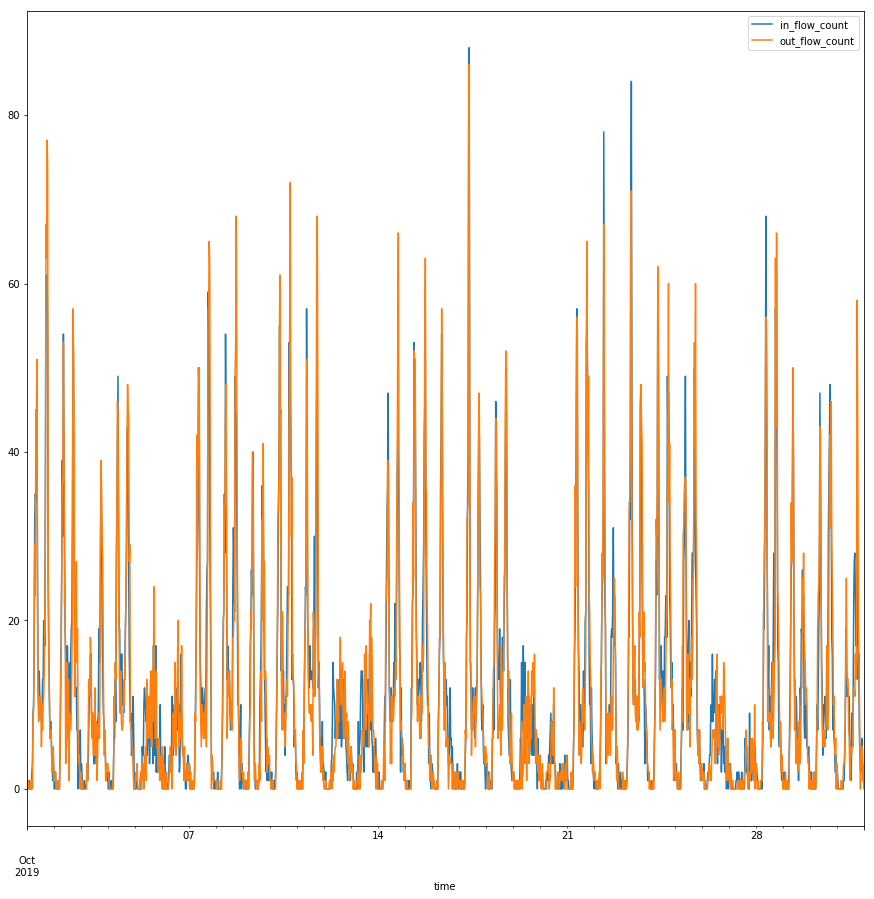

In [55]:
# Select station & add information in missing time
small_df = dat[dat['station id'] == 519].sort_values(by='time')
small_df = small_df.sort_values(by='time')

# Plot line chart
small_df.plot(x='time', y=['in_flow_count', 'out_flow_count'], kind='line', figsize=(15,15))
plt.show()

In [65]:
def gen_time_group(dt):
    if dt.day <= 10:
        return "Early-October"
    elif dt.day <= 20:
        return "Mid-October"
    else:
        return "Late-October"

In [66]:
flow = dat[['station id', 'time', 'flow_count']] 

# Create time group
flow['time_group'] = [gen_time_group(dt) for dt in flow['time']]

# Summarise flow count according to time group
flow = flow.groupby(["station id", "time_group"], as_index=False) \
            .agg({'flow_count': 'sum'})

# Add latitude/logitude columns
flow['latitude'] = [lat_dic[x] for x in flow['station id']]
flow['longitude'] = [lon_dic[x] for x in flow['station id']]

flow.head()

,station id,time_group,flow_count,latitude,longitude
0,72,Early-October,3264.0,40.767272,-73.993929
1,72,Late-October,149.0,40.767272,-73.993929
2,72,Mid-October,3526.0,40.767272,-73.993929
3,79,Early-October,1881.0,40.719116,-74.006667
4,79,Late-October,1920.0,40.719116,-74.006667


In [67]:
def plot_stations_map(ax, stns, noText=False):
    # determine range to print based on min, max lat and lon of the data
    lat = list(stns['latitude'])
    lon = list(stns['longitude'])
    siz = [(2)**(x/1000) for x in stns['flow_count']]
    margin = 0.01 # buffer to add to the range
    lat_min = min(lat) - margin
    lat_max = max(lat) + margin
    lon_min = min(lon) - margin
    lon_max = max(lon) + margin

    # create map using BASEMAP
    m = Basemap(llcrnrlon=lon_min,
                llcrnrlat=lat_min,
                urcrnrlon=lon_max,
                urcrnrlat=lat_max,
                lat_0=(lat_max - lat_min)/2,
                lon_0=(lon_max - lon_min)/2,
                projection='lcc',
                resolution = 'f',)

    m.drawcoastlines()
    m.fillcontinents(lake_color='aqua')
    m.drawmapboundary(fill_color='aqua')
    m.drawrivers()

    # convert lat and lon to map projection coordinates
    lons, lats = m(lon, lat)

    # plot points as red dots
    if noText:
        ax.scatter(lons, lats, marker = 'o', color='r', zorder=5, alpha=0.6, s=1)
        return
    else:
        ax.scatter(lons, lats, marker = 'o', color='r', zorder=5, alpha=0.3, s=siz)
    
    # annotate popular stations
    for i in range(len(siz)):
        if siz[i] >= 2**6:
            plt.text(lons[i], lats[i], text[i])

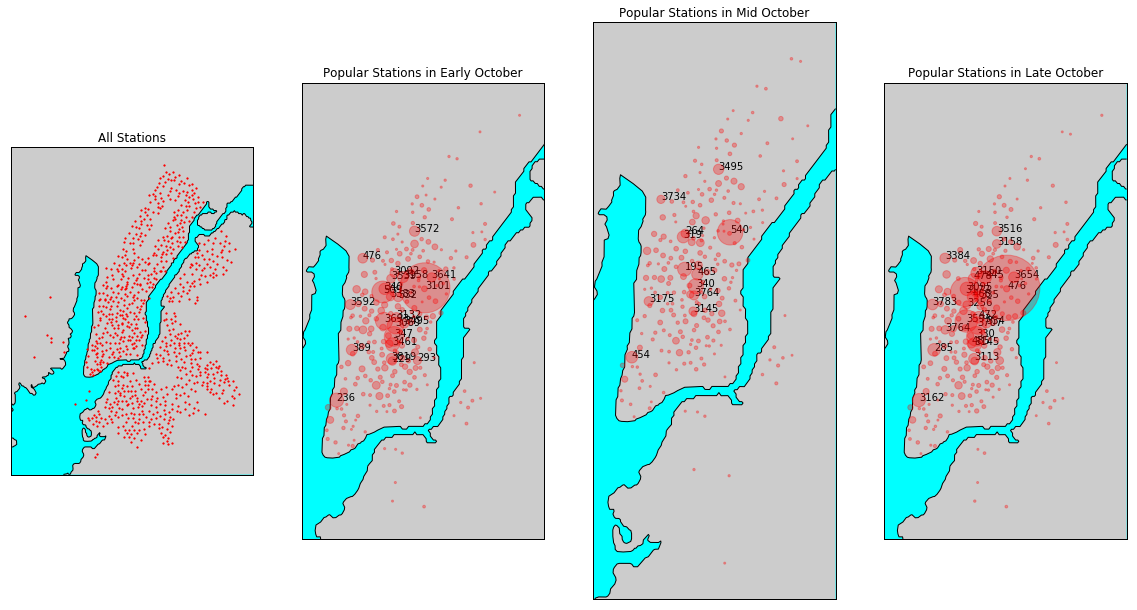

In [69]:
pop_flow = flow[flow['flow_count'] > 2000]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,20))
ax = plt.subplot(1, 4, 1)
ax.set_title("All Stations")
plot_stations_map(ax, flow, noText=True)
ax = plt.subplot(1, 4, 2)
ax.set_title("Popular Stations in Early October")
plot_stations_map(ax, pop_flow[pop_flow['time_group'] == "Early-October"])
ax = plt.subplot(1, 4, 3)
ax.set_title("Popular Stations in Mid October")
plot_stations_map(ax, pop_flow[pop_flow['time_group'] == "Mid-October"])
ax = plt.subplot(1, 4, 4)
ax.set_title("Popular Stations in Late October")
plot_stations_map(ax, pop_flow[pop_flow['time_group'] == "Late-October"])

In [70]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_seg,stop_seg
0,527,2019-10-01 00:00:05.618,2019-10-01 00:08:52.943,3746,6 Ave & Broome St,40.724308,-74.004730,223,W 13 St & 7 Ave,40.737815,-73.999947,41750,Subscriber,1993,1,2019-10-1 0:00,2019-10-1 0:00
1,174,2019-10-01 00:00:15.875,2019-10-01 00:03:10.168,3301,Columbus Ave & W 95 St,40.791956,-73.968087,3283,W 89 St & Columbus Ave,40.788221,-73.970416,18264,Subscriber,1992,1,2019-10-1 0:00,2019-10-1 0:00
2,759,2019-10-01 00:00:19.824,2019-10-01 00:12:59.707,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,174,E 25 St & 1 Ave,40.738177,-73.977387,25525,Subscriber,1995,1,2019-10-1 0:00,2019-10-1 0:00
3,615,2019-10-01 00:00:21.068,2019-10-01 00:10:36.679,254,W 11 St & 6 Ave,40.735324,-73.998004,477,W 41 St & 8 Ave,40.756405,-73.990026,30186,Subscriber,1992,1,2019-10-1 0:00,2019-10-1 0:00
4,761,2019-10-01 00:00:26.380,2019-10-01 00:13:08.313,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,174,E 25 St & 1 Ave,40.738177,-73.977387,25597,Subscriber,1992,1,2019-10-1 0:00,2019-10-1 0:00


In [10]:

df_loc = pd.read_csv("station_information.csv")
df_loc.head()

df_flow = pd.read_csv("station_flow.csv")
df_flow['time'] = pd.to_datetime(df_flow['time'], format='%Y-%m-%d %H:%M:%S')
df_flow.head()

from apyori import apriori


def apriori_find_association_rules(dataset, minsup, minconf):
    records = list(apriori(dataset, min_support=minsup, min_confidence=minconf))
    return records


def apriori_show_mining_results(records):
    ap = []
    for record in records:
        converted_record = record._replace(ordered_statistics=[x._asdict() for x in record.ordered_statistics])
        ap.append(converted_record._asdict())
    
    # print("Frequent Itemsets:\n------------------")
    # for ptn in ap:
    #    print('({})  support = {}'.format(", ".join(ptn["items"]), round(ptn["support"], 3)))
    # print()
    print("Rules:\n------")
    for ptn in ap:        
        for rule in ptn["ordered_statistics"]:
            head = rule["items_base"]
            tail = rule["items_add"]
            if len(head) == 0 or len(tail) == 0:
                continue
            confidence = rule["confidence"]
            print('({}) ==> ({})  confidence = {}'.format(', '.join(head), ', '.join(tail), round(confidence, 3)))
    print()



import pyfpgrowth

def fp_find_association_rules(dataset, minsup, minconf):
    patterns = pyfpgrowth.find_frequent_patterns(dataset, minsup*len(dataset))
    rules = pyfpgrowth.generate_association_rules(patterns, minconf)
    return (patterns, rules)

def fp_show_mining_results(ap, N):
    (patterns, rules) = ap
   
    #print("Frequent Itemsets:\n------------------")
    #for key, val in patterns.items():
    #    print('{}  support = {}'.format(key, round(val/N, 3)))
    #print()
    print("Rules:\n------")
    for key, val in rules.items():
        head = key
        tail = val[0]
        confidence = val[1]
        if len(tail) == 0:
            continue
        print('({}) ==> ({})  confidence = {}'.format(', '.join(head), ', '.join(tail), round(confidence, 3)))
    print()


dat = df_flow[df_flow['station id'] == 519][['in_flow_count', 'out_flow_count']]
dat.head(5)


pd.isnull(dat).sum()


print("Min: {}\nMax: {}".format(dat.values.min(), dat.values.max()))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,5))

ax = plt.subplot(2, 2, 1)
dat['in_flow_count'].hist(bins=25)
ax.set_title("in flow count")

ax = plt.subplot(2, 2, 2)
dat['out_flow_count'].hist(bins=25)
ax.set_title("out flow count")

ax = plt.subplot(2, 2, 3)
ax.set_yscale('log')
dat['in_flow_count'].hist(bins=25)
ax.set_title("in flow count (log scale)")

ax = plt.subplot(2, 2, 4)
ax.set_yscale('log')
dat['out_flow_count'].hist(bins=25)
ax.set_title("out flow count (log scale)")

fig.tight_layout()

ImportError: No module named apyori

In [74]:
import copy
dat_1 = copy.deepcopy(dat)

In [75]:
dat_1['in_flow_count'] = pd.cut(dat_1['in_flow_count'], bins = 5, \
                                labels = ["in.level-1", "in.level-2", "in.level-3", \
                                          "in.level-4", "in.level-5"]).astype(str)
pd.cut(dat['in_flow_count'], bins = 5).value_counts()

(-0.088, 17.6]    1186
(17.6, 35.2]       192
(35.2, 52.8]        82
(52.8, 70.4]        24
(70.4, 88.0]         4
Name: in_flow_count, dtype: int64

In [1]:
dat_1['out_flow_count'] = pd.cut(dat_1['out_flow_count'], bins = 5, \
                                labels = ["out.level-1", "out.level-2", "out.level-3", \
                                          "out.level-4", "out.level-5"]).astype(str)
pd.cut(dat['out_flow_count'], bins = 5).value_counts()

NameError: name 'pd' is not defined

In [78]:
#Discretization Method (2). equi-depth approach
#With equi-depth approach, I partition the data values into intervals with equal size along the ordering of the data

#"zero" = quantile 0~20
#"extreme-low" = quantile 20~40
#"low" = quantile 40~60
#"medium" = quantile 60~80
#"high" = quantile 80~100
dat_2 = copy.deepcopy(dat)

In [79]:
dat_2['out_flow_count'] = pd.qcut(dat_2['out_flow_count'], q = 5, \
                                labels = ["out.zero", "out.extreme-low", "out.low", \
                                          "out.medium", "out.high"]).astype(str)
pd.qcut(dat['out_flow_count'], q = 5).value_counts()

(-0.001, 1.0]    421
(8.0, 17.0]      295
(17.0, 86.0]     293
(4.0, 8.0]       249
(1.0, 4.0]       230
Name: out_flow_count, dtype: int64

In [96]:
dat_2['in_flow_count'] = pd.qcut(dat_2['in_flow_count'], q = 5, \
                                labels = ["in.zero", "in.extreme-low", "in.low", \
                                          "in.medium", "in.high"]).astype(str)
pd.qcut(dat['in_flow_count'], q = 5).value_counts()


(-0.001, 1.0]    386
(9.0, 18.0]      304
(18.0, 88.0]     281
(4.0, 9.0]       274
(1.0, 4.0]       243
Name: in_flow_count, dtype: int64

In [94]:
%%time
print("Apriori\n********")
ap = apriori_find_association_rules(dat_1.values.tolist(), 0.1, 0.2)


Apriori
********
Wall time: 4 ms


In [97]:
#The second task is to find that if there is any association rules between the time of a day and the flow counts of station 519.
dat = df_flow[df_flow['station id'] == 519][['time', 'in_flow_count', 'out_flow_count']]
dat['flow_count'] = dat['in_flow_count'] + dat['out_flow_count']
dat['time'] = ["{:02d}:{:02d}".format(dt.hour, dt.minute) for dt in dat['time']]
dat = dat[['time', 'flow_count']]
dat.head(5)

,time,flow_count
231264,00:00,2.0
231265,10:00,24.0
231266,10:30,18.0
231267,11:00,23.0
231268,11:30,22.0


In [154]:
#The third task is to find if there is any association rules between the location of a station and its daily flow counts.

dat = pd.merge(df_flow, df_loc, on=['station id'], how='left')
dat['flow_count'] = dat['in_flow_count'] + dat['out_flow_count']
dat['day'] = [dt.day for dt in dat['time']]
dat = dat.groupby(['station latitude', 'station longitude', "day"], as_index=False) \
            .agg({'flow_count': 'sum'})
dat = dat[['station latitude', 'station longitude', 'flow_count']]
dat.head(5)

,station latitude,station longitude,flow_count
0,40.6554,-74.010628,14.0
1,40.6554,-74.010628,12.0
2,40.6554,-74.010628,8.0
3,40.6554,-74.010628,18.0
4,40.6554,-74.010628,17.0


In [155]:
#With equi-sized approach, I partition the continuous domain into intervals with equal length.
pd.cut(dat['station latitude'], bins = 5).value_counts()

(40.688, 40.721]    7657
(40.721, 40.753]    5983
(40.753, 40.786]    5518
(40.655, 40.688]    4309
(40.786, 40.818]    2821
Name: station latitude, dtype: int64

In [157]:
pd.cut(dat['station longitude'], bins = 5).value_counts()

(-73.999, -73.968]    10075
(-73.968, -73.936]     9145
(-73.936, -73.904]     3596
(-74.031, -73.999]     3224
(-74.063, -74.031]      248
Name: station longitude, dtype: int64

In [158]:
dat_1 = copy.deepcopy(dat)
dat_1.head()

,station latitude,station longitude,flow_count
0,40.6554,-74.010628,14.0
1,40.6554,-74.010628,12.0
2,40.6554,-74.010628,8.0
3,40.6554,-74.010628,18.0
4,40.6554,-74.010628,17.0


In [159]:
dat_1['station latitude'] = pd.cut(dat_1['station latitude'], bins = 5)
dat_1['station latitude'] = "latitude = " + dat_1['station latitude'].astype(str)
dat_1['station longitude'] = pd.cut(dat_1['station longitude'], bins = 5)
dat_1['station longitude'] = "longitude = "+ dat_1['station longitude'].astype(str) 

In [160]:
dat_1.head()

,station latitude,station longitude,flow_count
0,"latitude = (40.655, 40.688]","longitude = (-74.031, -73.999]",14.0
1,"latitude = (40.655, 40.688]","longitude = (-74.031, -73.999]",12.0
2,"latitude = (40.655, 40.688]","longitude = (-74.031, -73.999]",8.0
3,"latitude = (40.655, 40.688]","longitude = (-74.031, -73.999]",18.0
4,"latitude = (40.655, 40.688]","longitude = (-74.031, -73.999]",17.0


In [161]:
#Note that I use the equi-depth approach to deal with the flow counts. (Intervals for ·extreme-low, 
#low, medium, high, and extreme-high flow #counts are shown as belows.)
dat_1['flow_count'] = pd.qcut(dat_1['flow_count'], q = 5, \
                             labels = ["extreme-low", "low", "medium", "high", "extreme-high"]).astype(str)
pd.qcut(dat['flow_count'], q = 5).value_counts()

(-0.001, 30.0]     5440
(274.0, 1609.0]    5256
(128.0, 274.0]     5241
(30.0, 65.0]       5179
(65.0, 128.0]      5172
Name: flow_count, dtype: int64

In [ ]:
#Discretization Method (2). equi-depth approach

#With equi-depth approach, I partition the data values into intervals with equal size along the ordering of the data.

In [142]:
 pd.qcut(dat['station latitude'], q = 5).value_counts()

(40.743, 40.769]    5270
(40.692, 40.715]    5270
(40.654, 40.692]    5270
(40.769, 40.818]    5239
(40.715, 40.743]    5239
Name: station latitude, dtype: int64

In [143]:
pd.qcut(dat['station longitude'], q = 5).value_counts()

(-73.959, -73.943]    5270
(-73.993, -73.979]    5270
(-74.063, -73.993]    5270
(-73.943, -73.904]    5239
(-73.979, -73.959]    5239
Name: station longitude, dtype: int64

In [162]:
dat_2 = copy.deepcopy(dat)


In [163]:
dat_2['station latitude'] = pd.qcut(dat_2['station latitude'], q = 5)
dat_2['station latitude'] = "latitude = " + dat_2['station latitude'].astype(str)
dat_2['station longitude'] = pd.qcut(dat_2['station longitude'], q = 5)
dat_2['station longitude'] = "longitude = "+ dat_2['station longitude'].astype(str)

In [164]:
dat_2['flow_count'] = pd.qcut(dat_2['flow_count'], q = 5, \
                             labels = ["extreme-low", "low", "medium", "high", "extreme-high"]).astype(str)
pd.qcut(dat['flow_count'], q = 5).value_counts()

(-0.001, 30.0]     5440
(274.0, 1609.0]    5256
(128.0, 274.0]     5241
(30.0, 65.0]       5179
(65.0, 128.0]      5172
Name: flow_count, dtype: int64

In [166]:
%%time
print("Apriori\n********")
ap = apriori_find_association_rules(dat_1.values.tolist(), 0.08, 0.4)

Apriori
********


In [167]:
apriori_show_mining_results(ap)

Rules:
------
(extreme-high) ==> (latitude = (40.721, 40.753])  confidence = 0.585
(latitude = (40.721, 40.753]) ==> (extreme-high)  confidence = 0.514
(extreme-high) ==> (longitude = (-73.999, -73.968])  confidence = 0.693
(extreme-low) ==> (latitude = (40.688, 40.721])  confidence = 0.431
(extreme-low) ==> (longitude = (-73.936, -73.904])  confidence = 0.412
(longitude = (-73.936, -73.904]) ==> (extreme-low)  confidence = 0.623
(high) ==> (longitude = (-73.999, -73.968])  confidence = 0.536
(latitude = (40.721, 40.753]) ==> (longitude = (-73.999, -73.968])  confidence = 0.544
(latitude = (40.786, 40.818]) ==> (longitude = (-73.968, -73.936])  confidence = 0.802
(low) ==> (longitude = (-73.968, -73.936])  confidence = 0.515
(medium) ==> (longitude = (-73.968, -73.936])  confidence = 0.484
(medium) ==> (longitude = (-73.999, -73.968])  confidence = 0.408
(extreme-high) ==> (latitude = (40.721, 40.753], longitude = (-73.999, -73.968])  confidence = 0.436
(latitude = (40.721, 40.753], ex

In [168]:
%%time
print("FP-Growth\n*********")
fp = fp_find_association_rules(dat_1.values.tolist(), 0.08, 0.4)

FP-Growth
*********


In [169]:
fp_show_mining_results(fp, dat_1.shape[0])

Rules:
------
(low) ==> (longitude = (-73.968, -73.936])  confidence = 0.515
(latitude = (40.721, 40.753], longitude = (-73.999, -73.968]) ==> (extreme-high)  confidence = 0.704
(longitude = (-73.936, -73.904]) ==> (extreme-low)  confidence = 0.623
(extreme-low) ==> (longitude = (-73.936, -73.904])  confidence = 0.412
(high) ==> (longitude = (-73.999, -73.968])  confidence = 0.536
(latitude = (40.786, 40.818]) ==> (longitude = (-73.968, -73.936])  confidence = 0.802
(extreme-high, latitude = (40.721, 40.753]) ==> (longitude = (-73.999, -73.968])  confidence = 0.746
(latitude = (40.721, 40.753]) ==> (extreme-high)  confidence = 0.514
(extreme-high, longitude = (-73.999, -73.968]) ==> (latitude = (40.721, 40.753])  confidence = 0.63
()


In [170]:
#Next, we mine the association rules of the transaction dataset that is discretized with equi-depth approach.
#support threshold = 0.08
#confidence threshold = 0.4

In [171]:
%%time
print("Apriori\n********")
ap = apriori_find_association_rules(dat_2.values.tolist(), 0.08, 0.4)

Apriori
********
Wall time: 147 ms


In [172]:
apriori_show_mining_results(ap)

Rules:
------
(extreme-high) ==> (latitude = (40.715, 40.743])  confidence = 0.461
(latitude = (40.715, 40.743]) ==> (extreme-high)  confidence = 0.462
(extreme-high) ==> (longitude = (-73.993, -73.979])  confidence = 0.415
(longitude = (-73.993, -73.979]) ==> (extreme-high)  confidence = 0.414
(extreme-low) ==> (longitude = (-73.943, -73.904])  confidence = 0.553
(longitude = (-73.943, -73.904]) ==> (extreme-low)  confidence = 0.574
()


In [173]:
%%time
print("FP-Growth\n*********")
fp = fp_find_association_rules(dat_2.values.tolist(), 0.08, 0.4)

FP-Growth
*********
Wall time: 338 ms


In [174]:
fp_show_mining_results(fp, dat_2.shape[0])

Rules:
------
(longitude = (-73.993, -73.979]) ==> (extreme-high)  confidence = 0.414
(latitude = (40.715, 40.743]) ==> (extreme-high)  confidence = 0.462
(extreme-high) ==> (longitude = (-73.993, -73.979])  confidence = 0.415
(extreme-low) ==> (longitude = (-73.943, -73.904])  confidence = 0.553
(longitude = (-73.943, -73.904]) ==> (extreme-low)  confidence = 0.574
()


In [175]:
def plot_stations_map(ax, stns, parallels_val, meridians_val):
    # determine range to print based on min, max lat and lon of the data
    lat = list(stns['station latitude'])
    lon = list(stns['station longitude'])
    siz = [(2)**(x/1000) for x in stns['flow_count']]
    margin = 0.01 # buffer to add to the range
    lat_min = min(lat) - margin
    lat_max = max(lat) + margin
    lon_min = min(lon) - margin
    lon_max = max(lon) + margin

    # create map using BASEMAP
    m = Basemap(llcrnrlon=lon_min,
                llcrnrlat=lat_min,
                urcrnrlon=lon_max,
                urcrnrlat=lat_max,
                lat_0=(lat_max - lat_min)/2,
                lon_0=(lon_max - lon_min)/2,
                projection='lcc',
                resolution = 'f',)

    m.drawcoastlines()
    m.fillcontinents(lake_color='aqua')
    m.drawmapboundary(fill_color='aqua')
    m.drawrivers()
    
    m.drawparallels(parallels_val,labels=[False,True,True,False])
    meridians = m.drawmeridians(meridians_val,labels=[True,False,False,True])
    for x in meridians:
        try:
            meridians[x][1][0].set_rotation(45)
        except:
            pass

    # convert lat and lon to map projection coordinates
    lons, lats = m(lon, lat)

    # plot points as red dots
    ax.scatter(lons, lats, marker = 'o', color='r', zorder=5, alpha=0.6, s=1)
def show_discretization_result():
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,15))

    ax = plt.subplot(1, 2, 1)
    ax.set_title("Equi-Sized")
    parallels_val = np.array([40.655, 40.685, 40.715, 40.745, 40.774, 40.804])
    meridians_val = np.array([-73.93, -73.957, -73.985, -74.012, -74.04, -74.067])
    plot_stations_map(ax, dat, parallels_val, meridians_val)

    ax = plt.subplot(1, 2, 2)
    ax.set_title("Equi-Depth")
    parallels_val = np.array([40.655, 40.691, 40.715, 40.735, 40.762, 40.804])
    meridians_val = np.array([-73.93, -73.957, -73.976, -73.987, -73.998, -74.068])
    plot_stations_map(ax, dat, parallels_val, meridians_val)

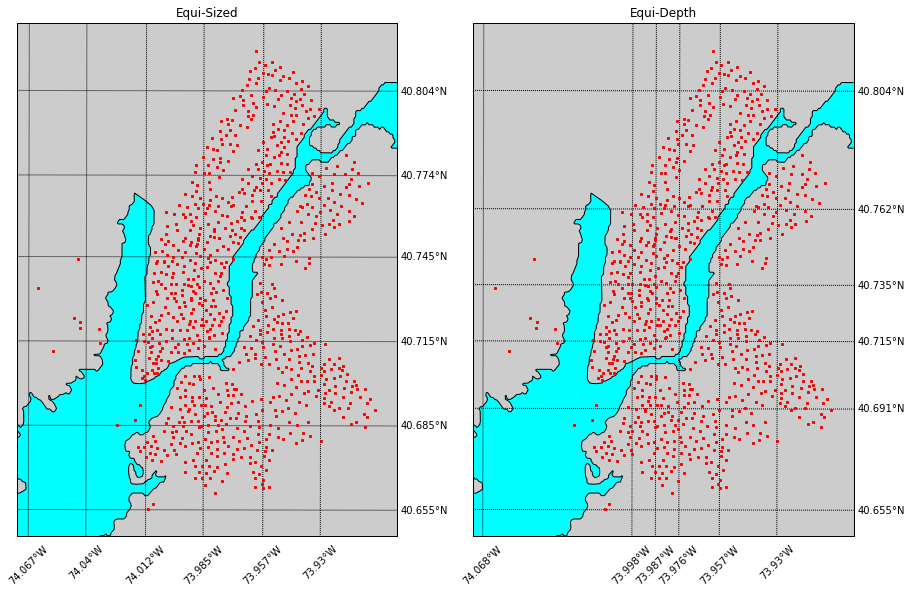

In [176]:
show_discretization_result()

In [ ]:
With equi-sized approach, we can find more rules and higher confidence. I think it is because using equi-depth approach would make all splitted areas have the same density of stations, while a station is actually built according to the population or say, estimated flow count, of that area. As the result,
the number of rules mined with equi-depth approach and their confidence would likely to be low.